In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [72]:
df = pd.read_csv("covid_agg_data.txt", header=None, names=["Year", "Month", "City", "Sex", "Positives"])
df.head()

,Year,Month,City,Sex,Positives
0,2022,7,SANTA COLOMA DE GRAMENET,Home,5022
1,2021,11,BARCELONA,Home,55548
2,2022,6,L'HOSPITALET DE LLOBREGAT,Home,19098
3,2020,5,BADALONA,Home,3042
4,2020,4,BADALONA,Dona,9522


In [73]:
df["Year"] = df["Year"].astype(str)
df["Month"] = df["Month"].astype(str)
df = df.replace(to_replace={'1': '01', '2': '02', '3':'03', '4':'04',
                            '5': '05', '6': '06', '7': '07', '8': '08',
                            '9': '09'}).sort_values(by=["Year","Month"])

df["Mth_Year"] = df["Year"] + "-" + df["Month"]
df.head(4)

,Year,Month,City,Sex,Positives,Mth_Year
60,2020,03,SANTA COLOMA DE GRAMENET,Home,5238,2020-03
64,2020,03,SANT ADRIÀ DE BESÒS,Home,1386,2020-03
71,2020,03,SANTA COLOMA DE GRAMENET,Dona,5994,2020-03
75,2020,03,SANT ADRIÀ DE BESÒS,Dona,1638,2020-03


In [74]:
df = df.sort_values(by="Mth_Year").reset_index()

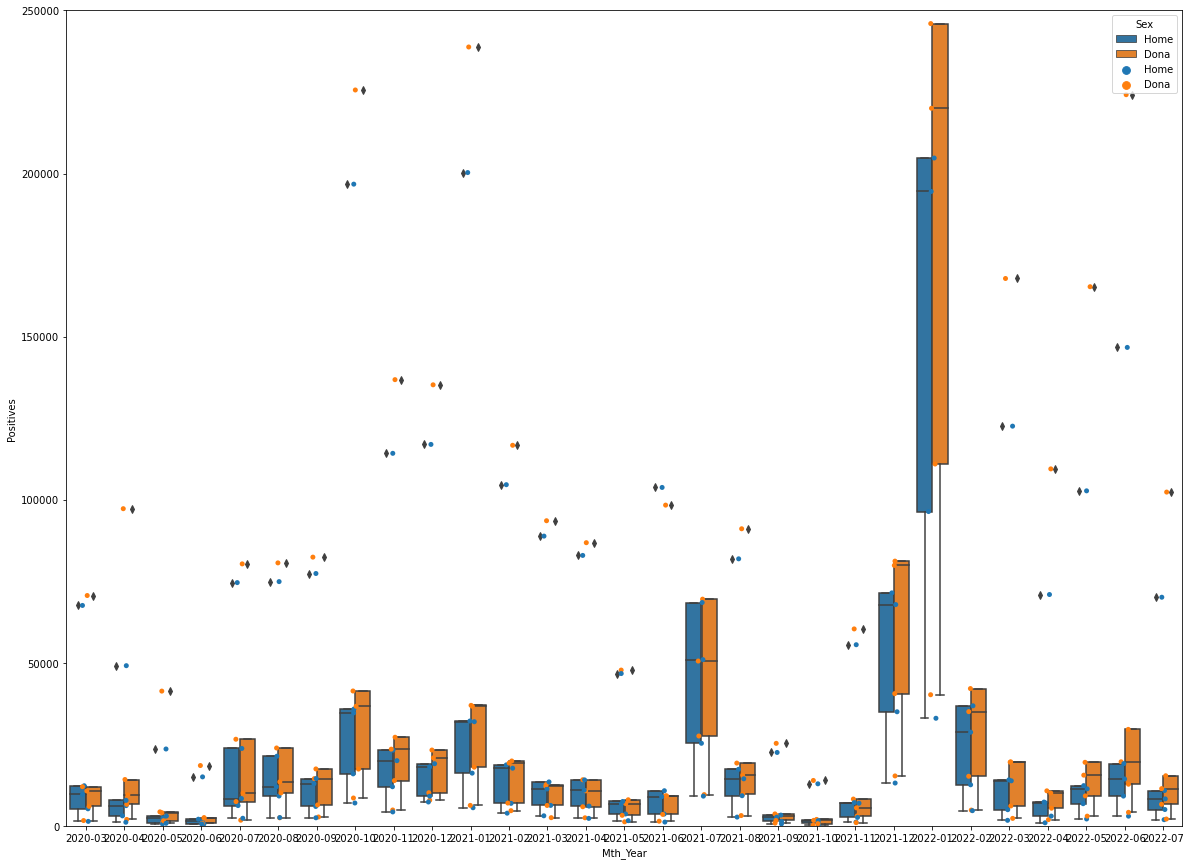

In [75]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.boxplot(x="Mth_Year", y="Positives", data=df, hue="Sex")
sns.stripplot(x="Mth_Year", y="Positives", data=df, hue="Sex")
plt.ylim(0, 250000)

plt.show()

In [76]:
sex_positives_df = df[["Sex", "Mth_Year", "Positives"]].groupby(by=["Sex", "Mth_Year"]).mean().reset_index()
sex_positives_df.head()

,Sex,Mth_Year,Positives
0,Dona,2020-03,20200.0
1,Dona,2020-04,25916.4
2,Dona,2020-05,10436.4
3,Dona,2020-06,5000.4
4,Dona,2020-07,25232.4


In [77]:
w_df = df.loc[df["Sex"] == "Dona"]
m_df = df.loc[towns_positives_df["Sex"] == "Home"]

In [78]:
w_pos_df = sex_positives_df.loc[sex_positives_df["Sex"] == "Dona"]
m_pos_df = sex_positives_df.loc[sex_positives_df["Sex"] == "Home"]

fig = go.Figure()

fig.update_layout(yaxis_range=[0, 450000])

fig.add_trace(go.Scatter(x=w_pos_df["Mth_Year"], y=w_pos_df["Positives"],
             name="Dones"))
fig.add_trace(go.Scatter(x=m_pos_df["Mth_Year"], y=m_pos_df["Positives"],
             name="Homes"))

fig.show()

In [107]:
df = df.loc[df["Year"] == "2021"]
sex_positives_df = df[["Sex", "Mth_Year", "Positives"]].groupby(by=["Sex", "Mth_Year"]).mean().reset_index()
sex_positives_df.head()

w_df = df.loc[df["Sex"] == "Dona"]
m_df = df.loc[df["Sex"] == "Home"]

w_pos_df = sex_positives_df.loc[sex_positives_df["Sex"] == "Dona"]
m_pos_df = sex_positives_df.loc[sex_positives_df["Sex"] == "Home"]

fig = go.Figure()

fig.update_layout(yaxis_range=[0, 180000])

fig.add_trace(go.Scatter(x=w_pos_df["Mth_Year"], y=w_pos_df["Positives"],
             name="Dones", marker_color='rgb(212, 67, 16)'))
fig.add_trace(go.Scatter(x=m_pos_df["Mth_Year"], y=m_pos_df["Positives"],
             name="Homes", marker_color='rgb(51, 218, 255)'))

fig.add_trace(go.Box(
    x=w_df["Mth_Year"], y=w_df["Positives"],
    jitter=0.8,
    boxpoints="all",
    pointpos=-.3,
    marker=dict(
        color='rgb(212, 67, 16)',
        outliercolor='rgba(219, 64, 82, 0.6)'),
    line = dict(color = 'rgba(0,0,0,0)'),
    fillcolor = 'rgba(0,0,0,0)',
    showlegend=False))

fig.add_trace(go.Box(
    x=m_df["Mth_Year"], y=m_df["Positives"],
    jitter=0.8,
    boxpoints="all",
    pointpos=.3,
    marker=dict(
        color='rgb(51, 218, 255)',
        outliercolor='rgba(219, 64, 82, 0.6)'),
    line = dict(color = 'rgba(0,0,0,0)'),
    fillcolor = 'rgba(0,0,0,0)',
    showlegend=False))

fig.update_layout(template="plotly_white", title="COVID Cases by Gender in 2021 in AMB")

fig.show()

In [100]:
df.head()

,index,Year,Month,City,Sex,Positives,Mth_Year
100,121,2021,01,SANT ADRIÀ DE BESÒS,Home,5563,2021-01
101,35,2021,01,SANTA COLOMA DE GRAMENET,Home,16175,2021-01
102,47,2021,01,SANTA COLOMA DE GRAMENET,Dona,18009,2021-01
103,102,2021,01,BARCELONA,Home,200310,2021-01
104,110,2021,01,BARCELONA,Dona,238810,2021-01
